In [53]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import statistics as stats
import matplotlib.ticker as ticker
%matplotlib inline
survey_data = '/home/zsherman/Documents/SurveySummary_08192016.xlsx'

In [2]:
def panda_question_read(sheet_number, skip_footer_number):
    qsheet_number = pd.read_excel(survey_data, sheetname=('Question %s' % sheet_number), 
                      skiprows=2, skip_footer=skip_footer_number,
                      index_col='Answer Options')
    
    if ('Response Count' in qsheet_number.columns):
         qsheet_number.rename(columns={'Response Count': 'Q%s Response Count' % sheet_number}, 
                         inplace=True)
    if ('Rating Average' in qsheet_number.columns):
         qsheet_number.rename(columns={'Rating Average': 'Q%s Rating Average' % sheet_number}, 
                         inplace=True)
    if ('Response Percent' in qsheet_number.columns):
         qsheet_number.rename(columns={'Response Percent': 'Q%s Response Percent' % sheet_number}, 
                         inplace=True)
        
    del qsheet_number['Answer Options.1']
    

    #qsheet_number[qsheet_number ==0] = np.nan
    #qsheet_number.dropna()
    #qsheet_number_columns = np.asanyarray(qsheet_number.columns[:12])
    #qsheet_number_int = qsheet_number_columns.astype(np.float64)
    #qsheet_number_values = qsheet_number_no_zeros.iloc[0:13,0:12]+1 * qsheet_number_int

    #qsheet_number_values = qsheet_number_no_zeros[qsheet_number_no_zeros >0 * np.float(qsheet_number_no_zeros.iloc[:])]
  
    #qsheet_number['mean'] = qsheet_number_values.mean(axis=1)
    #qsheet_number['var'] = qsheet_number_values.var(axis=1)
    #qsheet_number['std'] = qsheet_number.std(axis=1)
    
    
    return qsheet_number

In [192]:
#Used for pie plots throughout notebook.
def make_autopct(q):
    def my_autopct(pct):
        total = sum(q)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

colors = ['#0038E2','#0055D4','#0071C6','#008DB8',
          '#00AAAA','#00C69C','#00E28E','#00FF80']
#explode = (0, 0.025, 0.05,0.1,0.1,0.2,0.3,0.4)
#'#191970','#001CF0',

In [221]:
q1 = panda_question_read(1, 2)
q1 = q1.rename({'Yes': 'User', 'No': 'Non-User'})
q1

,Q1 Response Percent,Q1 Response Count
Answer Options,,
User,0.686,24
Non-User,0.314,11


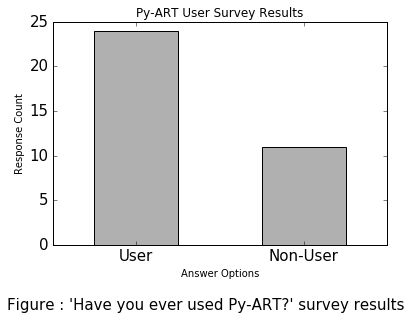

In [222]:
q1['Q1 Response Count'].plot.bar(title='Py-ART User Survey Results', color=['#b0b0b0'], fontsize=15, rot=0)

plt.figtext(.02, -.1, "Figure : 'Have you ever used Py-ART?' survey results", 
            fontsize=15)
plt.ylabel('Response Count')
plt.savefig('/home/zsherman/pyart-roadmap/roadmap/images/usage-barchart.png', bbox_inches='tight')
plt.show()

## Non-User
get interested in pyart combine q13 and q20
belongs to combine 11 and 18
role combine 10, 17


## User
belongs to combine 36 and 46
role 35 45
possible feature 41, 51
favorite feature 40, 50

## New Feature Non_User

In [4]:
q20 = panda_question_read(20, 2)

In [5]:
q13 = panda_question_read(13, 2)

In [6]:
#(q51.iloc[0:13,0:13].mul(q51_int, axis=1))
results = []
def result_calc(result_row):
    results = []
    #print("result_row:" + str(result_row))
    for idx, val in enumerate(result_row):
        #print("index: " + str(idx))
        #print("value:" + str(val))
        if(val > 0):
            for x in range(0, val):
                results = results + [idx + 1]
                   
    #print(results)
    return results

q20_results = q20.iloc[0:13,0:13]
q13_results = q13.iloc[0:13,0:13]
#print(np.apply_along_axis(result_calc, axis=1, arr=np.asanyarray(q51_results)))
q20_values = np.asanyarray(q20_results)
q13_values = np.asanyarray(q13_results)

#rows = len(test[:,1])

#individual_responses_51 = []
#for row in range(rows):
    #individual_responses_51 = individual_responses_51 + ([result_calc(q51_values[row])])
#df_51 = pd.DataFrame(individual_responses_51)
#print (individual_responses_51)

#individual_responses_41 = []
#for row in range(rows):
    #individual_responses_41 = individual_responses_41 + ([result_calc(q41_values[row])])
#df_41 = pd.DataFrame(individual_responses_41)
#df_41['mean']=df_41.mean(axis=1)
#df_41

In [93]:
q13_20_values = q13_values + q20_values

rating_average_totals = []
for answer_options in range(len(q20_values[:,1])):

    total= sum(result_calc(q13_20_values[answer_options]))
    rating_average_totals = rating_average_totals + [total]
    response_count = np.sum(q13_20_values, axis=1)
    
    
df_13_20_combo = q13_results + q20_results
df_13_20_combo.iloc[0:13,0:13]


df_13_20_combo["Rating Average"]=rating_average_totals/response_count
df_13_20_combo_sorted = df_13_20_combo.sort("Rating Average", ascending=False, axis=0)
df_13_20_combo_sorted

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,1,2,3,4,5,6,7,8,9,10,11,12,13,Rating Average
Answer Options,,,,,,,,,,,,,,
Add the option of Cartopy map backend to the existing basemap in RadarMapDisplay,0,0,0,0,1,0,0,0,0,1,0,0,1,9.333333
Ingest of WRF data into the Py-ART Grid Model,0,0,0,0,0,0,0,0,1,0,0,0,0,9.000000
"More data quality code (eg clutter rejection, biological masks..)",0,1,0,0,0,0,0,0,0,1,0,1,0,8.000000
More input formats,0,0,0,0,1,0,1,0,0,0,1,0,0,7.666667
More output formats,1,0,0,0,0,2,0,0,0,0,0,1,0,6.250000
"More Bulk statistics of grid or radar contents (CFAD, echo top heights etc..)",0,0,1,1,0,0,0,0,0,0,1,0,0,6.000000
Quasi-Vertical Profile reconstruction from a list of radars,0,0,0,2,0,0,1,0,1,0,0,0,0,6.000000
Ability to handle Radar Spectra and perform retrievals on that,0,0,1,0,0,1,1,1,0,0,0,0,0,6.000000
"Easier ""One step"" rainfall retrievals",1,0,0,0,0,0,0,1,0,0,0,0,0,4.500000


## New Feature User

In [94]:
q51 = panda_question_read(51, 2)
q41 = panda_question_read(41, 2)    

q51_results = q51.iloc[0:13,0:13]
q41_results = q41.iloc[0:13,0:13]
q51_values = np.asanyarray(q51_results)
q41_values = np.asanyarray(q41_results)

In [95]:
q41_51_values = q41_values + q51_values

rating_average_totals = []
for answer_options in range(len(q51_values[:,1])):

    total= sum(result_calc(q41_51_values[answer_options]))
    rating_average_totals = rating_average_totals + [total]
    response_count = np.sum(q41_51_values, axis=1)
    

df_41_51_combo = q41_results + q51_results
df_41_51_combo.iloc[0:13,0:13]


df_41_51_combo["Rating Average"]=rating_average_totals/response_count
df_41_51_combo_sorted = df_41_51_combo.sort("Rating Average", ascending=False, axis=0)
df_41_51_combo['Response Count']=response_count

df_41_51_combo_sorted

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,1,2,3,4,5,6,7,8,9,10,11,12,13,Rating Average
Answer Options,,,,,,,,,,,,,,
"More high level retrievals from the literature (Eg DSD, Particle ID..)",0,1,0,2,0,1,2,0,0,1,5,3,1,9.000000
Ability to handle Radar Spectra and perform retrievals on that,0,1,0,1,0,1,1,2,1,0,1,2,2,8.750000
"Easier ""One step"" rainfall retrievals",0,1,1,0,3,1,0,1,3,3,2,1,2,8.388889
Add the option of Cartopy map backend to the existing basemap in RadarMapDisplay,0,0,0,0,2,3,2,2,0,2,1,2,0,8.071429
Ingest of WRF data into the Py-ART Grid Model,1,3,1,1,0,1,3,0,2,0,2,0,3,7.058824
"More data quality code (eg clutter rejection, biological masks..)",0,2,2,1,0,3,1,1,4,3,0,1,0,6.944444
Quasi-Vertical Profile reconstruction from a list of radars,1,0,0,1,5,0,2,2,0,3,1,0,0,6.733333
Velocity Azimuth Display wind retrievals,0,1,2,2,0,3,1,3,3,1,0,1,0,6.705882
More input formats,1,1,1,3,2,1,3,0,1,1,1,2,0,6.411765


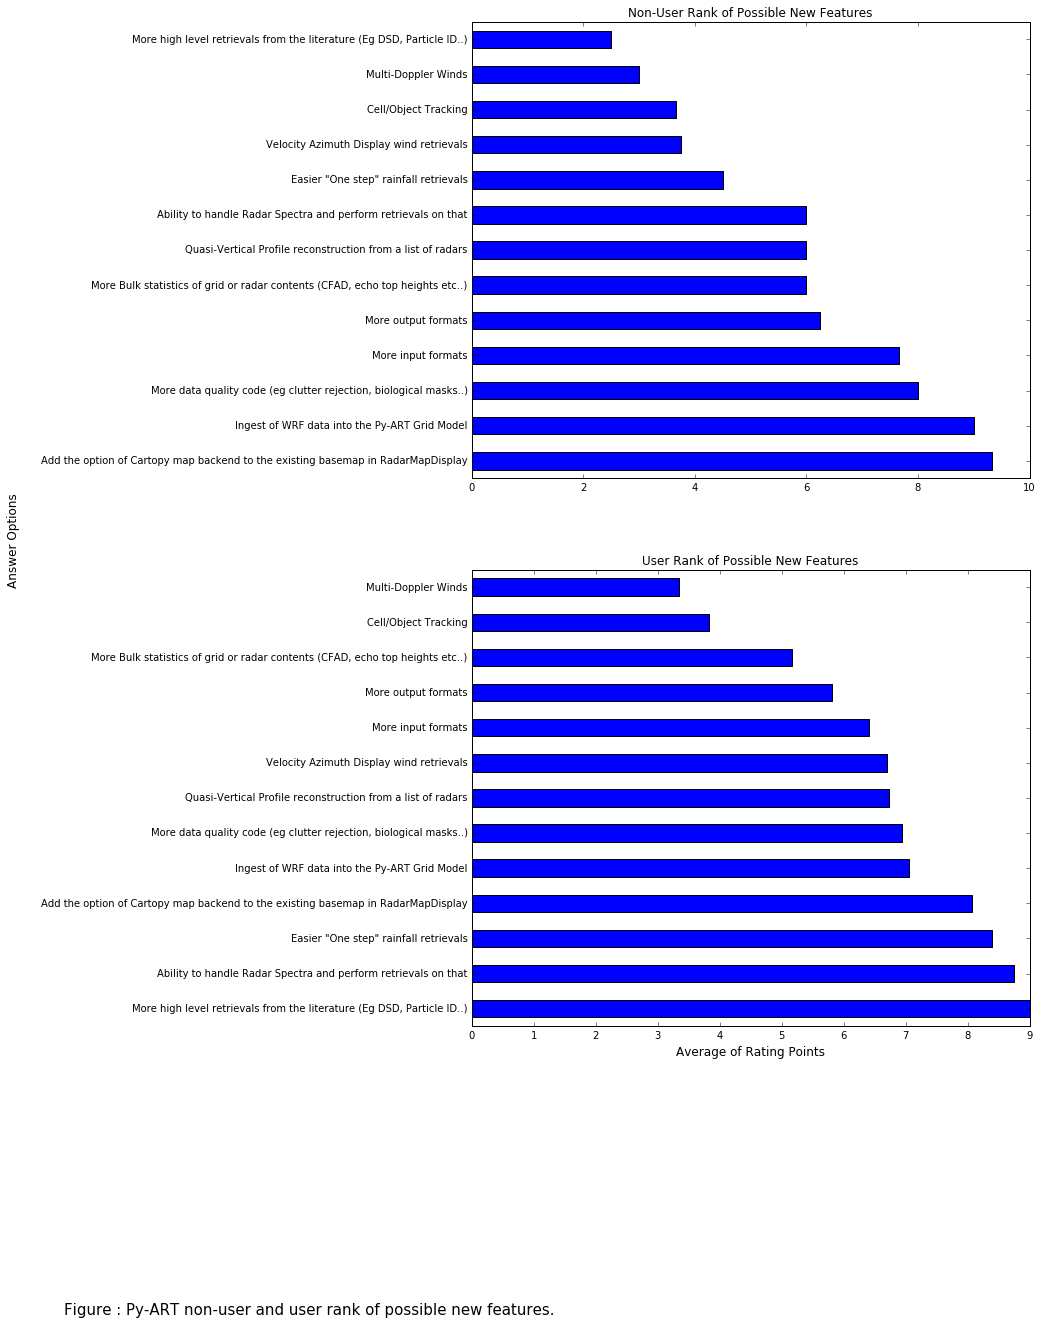

In [165]:
fig = plt.figure(figsize=(10,18))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.subplots_adjust(hspace=.2)

df_13_20_combo_sorted['Rating Average'].plot.barh(ax=ax1,
                                                  title='Non-User Rank of Possible New Features')
ax1.set_ylabel('')

df_41_51_combo_sorted['Rating Average'].plot.barh(ax=ax2,title='User Rank of Possible New Features')

ax2.set_xlabel("Average of Rating Points", fontsize=12)
ax2.set_ylabel('')
plt.figtext(-.52, 0.5, 'Answer Options', va='center', rotation='vertical', fontsize=12)
plt.figtext(-.1, -.1, "Figure : Py-ART non-user and user rank of possible new features.", 
            fontsize=15, ha='center', va='bottom')

plt.savefig('/home/zsherman/pyart-roadmap/roadmap/images/nonuser_user_favoritefeatures_barchart.png', bbox_inches='tight')

plt.show()

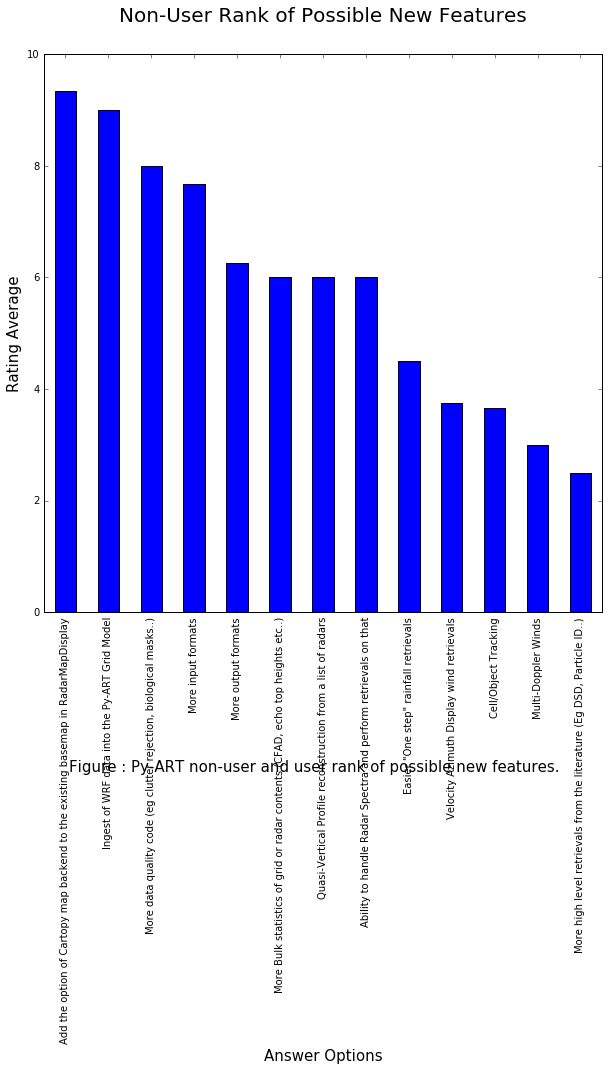

In [167]:
fig = plt.figure(figsize=(10,10))
df_13_20_combo_sorted['Rating Average'].plot.bar()
plt.figtext(.5, -.1, "Figure : Py-ART non-user and user rank of possible new features.", 
            fontsize=15, ha='center', va='bottom')
plt.xlabel('Answer Options', fontsize=15)
plt.ylabel('Rating Average', fontsize=15)
plt.title('Non-User Rank of Possible New Features', fontsize=20, y=1.05)
plt.show()

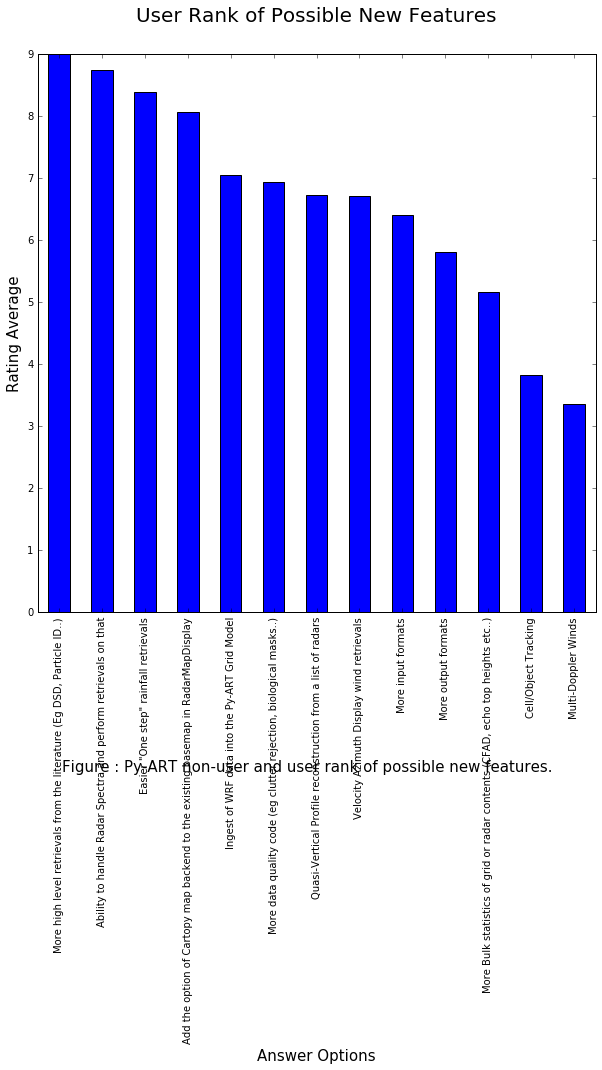

In [98]:
fig = plt.figure(figsize=(10,10))
df_41_51_combo_sorted['Rating Average'].plot.bar()
plt.figtext(.5, -.1, "Figure : Py-ART non-user and user rank of possible new features.", 
            fontsize=15, ha='center', va='bottom')
plt.xlabel('Answer Options', fontsize=15)
plt.ylabel('Rating Average', fontsize=15)
plt.title('User Rank of Possible New Features', fontsize=20, y=1.05)
plt.show()

## Favorite Feature User

In [102]:
q40 = panda_question_read(40, 2)
q50 = panda_question_read(50, 2)

q40_results = q40.iloc[0:9,0:9]
q50_results = q50.iloc[0:9,0:9]

q50_values = np.asanyarray(q50_results)
q40_values = np.asanyarray(q40_results)

q40_50_values = q40_values + q50_values

rating_average_totals = []
for answer_options in range(len(q50_values[:,1])):

    total= sum(result_calc(q40_50_values[answer_options]))
    rating_average_totals = rating_average_totals + [total]
    response_count = np.sum(q40_50_values, axis=1)
    

df_40_50_combo = q40_results + q50_results
df_40_50_combo.iloc[0:9,0:9]


df_40_50_combo["Rating Average"]=rating_average_totals/response_count
df_40_50_combo.sort_values(by='Rating Average')
df_40_50_combo['Response Count']=response_count
df_40_50_combo_sorted = df_40_50_combo.sort("Rating Average", ascending=False, axis=0)
df_40_50_combo_sorted

/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,1,2,3,4,5,6,7,8,9,Rating Average,Response Count
Answer Options,,,,,,,,,,,
Knowing VAPS developed easily integrate with ADI/ARM systems,0,0,0,0,1,0,0,1,5,8.285714,7
Polarimetric phase processing processing (other),0,1,0,0,3,2,5,1,0,6.000000,12
Attenuation Correction,0,0,2,3,0,2,5,1,1,5.857143,14
Polarimetric phase processing processing (LP),0,0,1,3,2,2,2,2,0,5.583333,12
As a dependency for CSU_Tools or ARTView or other,1,1,2,1,3,2,1,2,0,4.846154,13
Gridding including gridding multiple radars,1,3,1,1,4,1,0,3,0,4.571429,14
Dealiasing,1,4,1,4,1,3,0,1,0,3.933333,15
So many formats,4,4,4,2,0,0,0,1,1,3.062500,16
Plotting/visualization,8,3,4,0,0,1,0,0,0,2.000000,16


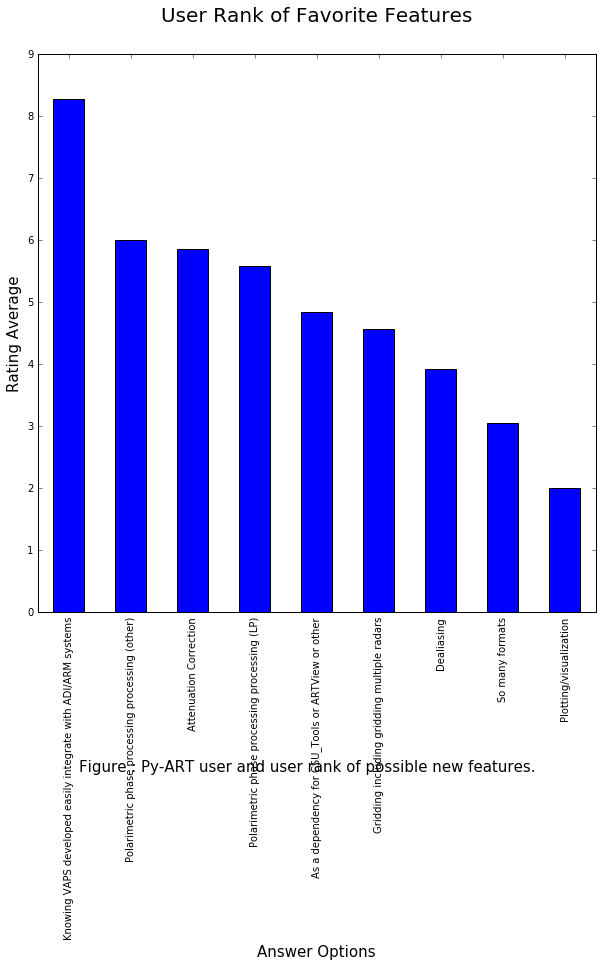

In [116]:
fig = plt.figure(figsize=(10,10))
df_40_50_combo_sorted['Rating Average'].plot.bar(rot=90)
plt.figtext(.5, -.1, "Figure : Py-ART user and user rank of possible new features.", 
            fontsize=15, ha='center', va='bottom')
plt.xlabel('Answer Options', fontsize=15)
plt.ylabel('Rating Average', fontsize=15)
plt.title('User Rank of Favorite Features', fontsize=20, y=1.05)
plt.show()

## Organization Belong to Non-User

In [128]:
q11 = panda_question_read(11, 2)
q18 = panda_question_read(18, 2)    

q18_results = q18.iloc[0:8,1]
q11_results = q11.iloc[0:8,1]


In [209]:
q11_18_values = q11_results + q18_results
df_11_18_combo= pd.DataFrame(q11_18_values)
df_11_18_combo = df_11_18_combo.rename(columns={0: 'Response Count'})
df_11_18_combo_no_zeros = df_11_18_combo.loc[df_11_18_combo['Response Count'] != 0]
df_11_18_combo

,Response Count
Answer Options,
University,2
"Government contractor, USA (eg National Lab, NCAR)",1
"Government contractor, Non-USA",0
US Government Employee,0
Employ of a Government but not the US,1
Private Industry,0
Self employed or unemployed,0
none of the above,0


/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


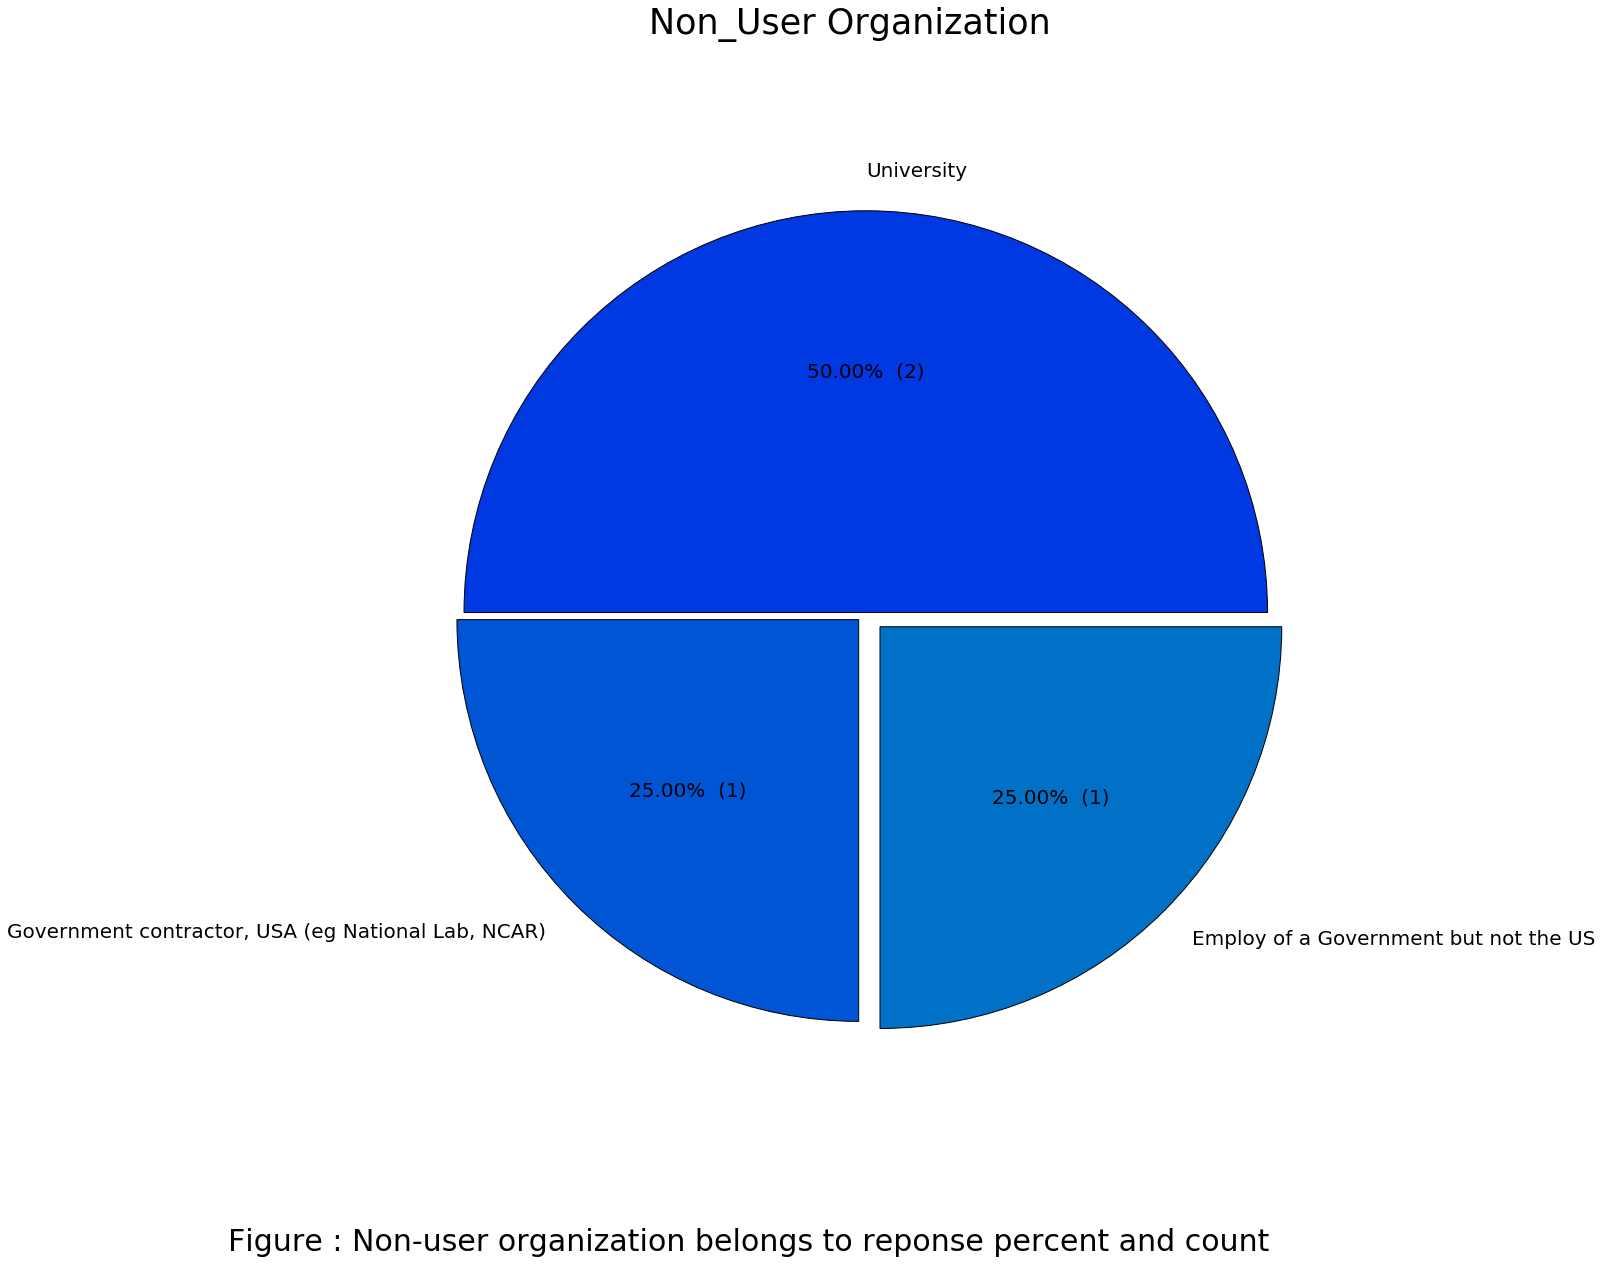

In [210]:
explode = 0, 0.025, 0.05
df_11_18_combo_sorted = df_11_18_combo_no_zeros.sort('Response Count', ascending=False)
df_11_18_combo_sorted['Response Count'].plot.pie(figsize=(18, 18), 
                                     autopct=make_autopct(df_11_18_combo_no_zeros['Response Count']),
                                     colors=colors, fontsize=20, explode=explode)
plt.ylabel('')
plt.suptitle('Non_User Organization', fontsize=35)
plt.figtext(.02, .02, "Figure : Non-user organization belongs to reponse percent and count", 
            fontsize=30)
plt.show()

## Organization Belong to User

In [131]:
q36 = panda_question_read(36, 2)
q46 = panda_question_read(46, 2)    

q36_results = q36.iloc[0:8,1]
q46_results = q46.iloc[0:8,1]


In [205]:
q36_46_values = q36_results + q46_results
df_36_46_combo= pd.DataFrame(q36_46_values)
df_36_46_combo = df_36_46_combo.rename(columns={0: 'Response Count'})
df_36_46_combo_no_zeros = df_36_46_combo.loc[df_36_46_combo['Response Count'] != 0]
df_36_46_combo

,Response Count
Answer Options,
University,12
"Government contractor, USA (eg National Lab, NCAR)",0
"Government contractor, Non-USA",2
US Government Employee,1
Employ of a Government but not the US,1
Private Industry,1
Self employed or unemployed,1
none of the above,0


/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


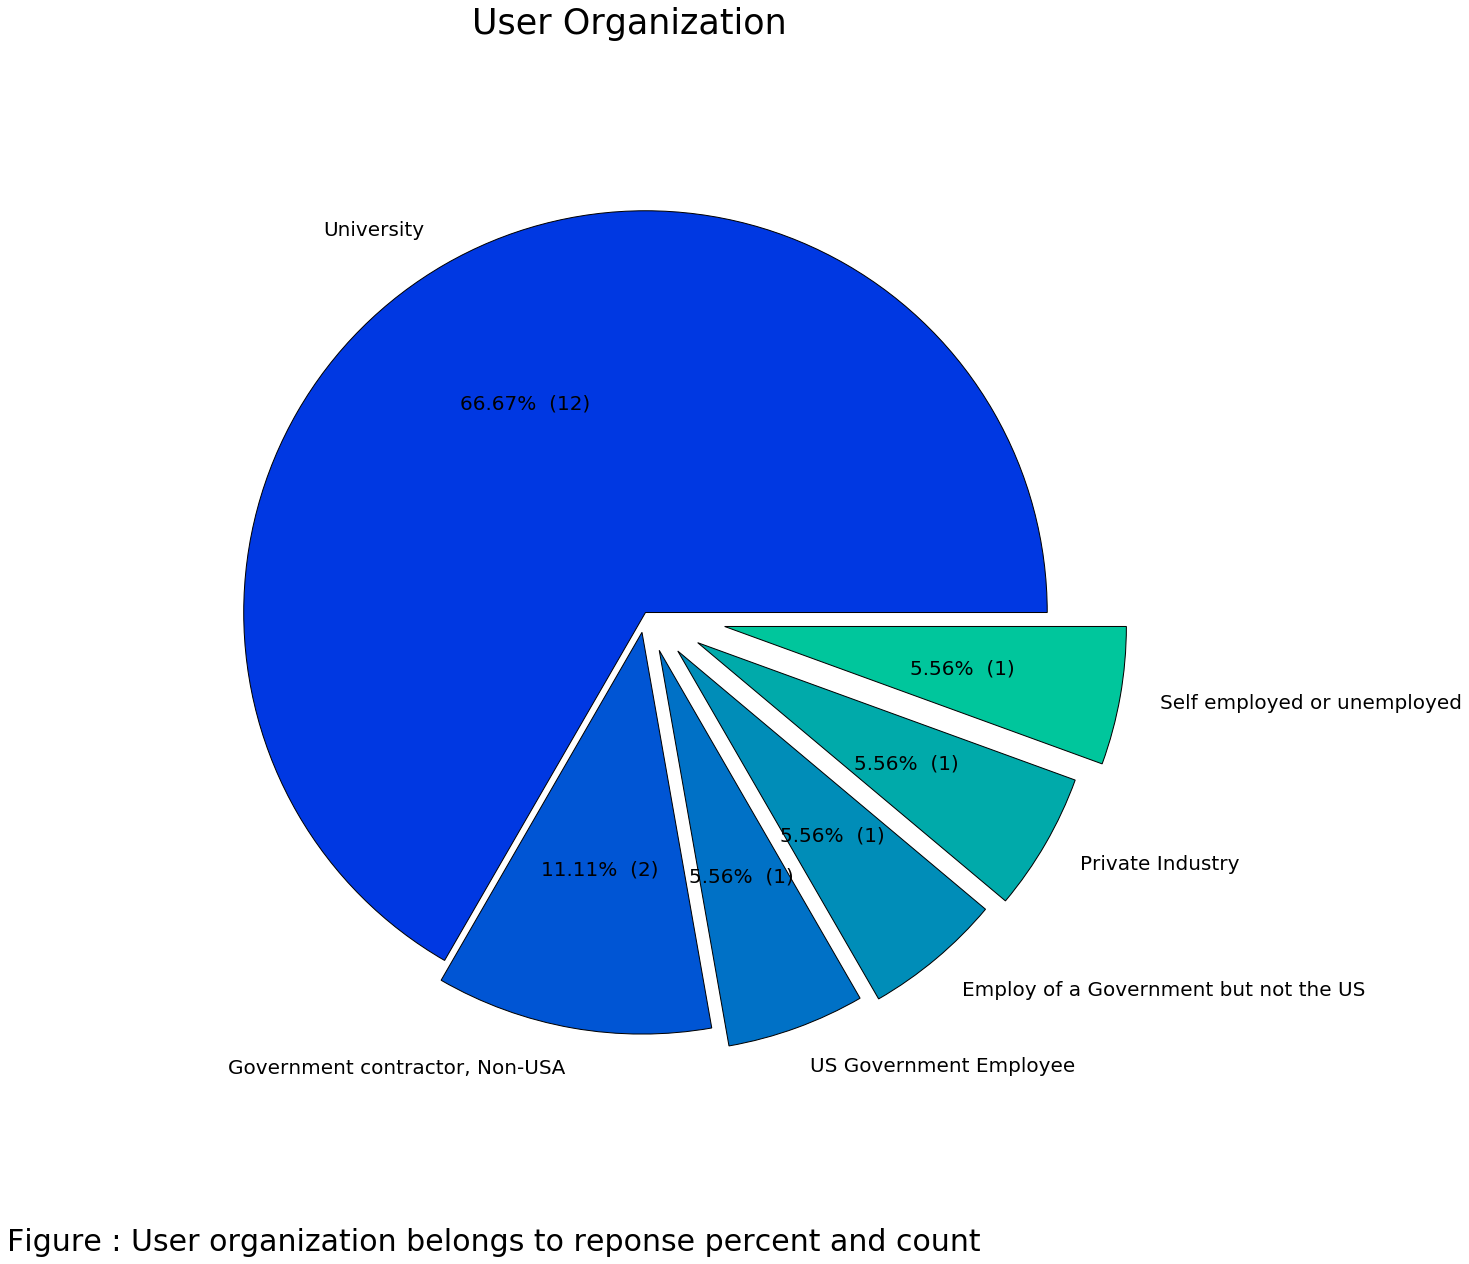

In [232]:
explode= 0, 0.05, 0.1,0.125,0.15,0.2
df_36_46_combo_sorted = df_36_46_combo_no_zeros.sort('Response Count', ascending=False)
df_36_46_combo_sorted['Response Count'].plot.pie(figsize=(18, 18), 
                                     autopct=make_autopct(df_36_46_combo_no_zeros['Response Count']),
                                     colors=colors, fontsize=20, explode=explode)
plt.ylabel('')
plt.suptitle('User Organization', fontsize=35)
plt.figtext(.02, .02, "Figure : User organization belongs to reponse percent and count", 
            fontsize=30)
plt.show()

## Non-User Organization Role

In [134]:
q10 = panda_question_read(10, 2)
q17 = panda_question_read(17, 2)    

q10_results = q10.iloc[0:8,1]
q17_results = q17.iloc[0:8,1]

In [211]:
q10_17_values = q10_results + q17_results
df_10_17_combo= pd.DataFrame(q10_17_values)
df_10_17_combo = df_10_17_combo.rename(columns={0: 'Response Count'})
df_10_17_combo_no_zeros = df_10_17_combo.loc[df_10_17_combo['Response Count'] != 0]
df_10_17_combo

,Response Count
Answer Options,
Undergraduate Student,0
Graduate student,0
Research assistant,1
Postdoctoral,1
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",2
Tenure track or Tenured Proffessor,0
Retired,0
None of the above,0


/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


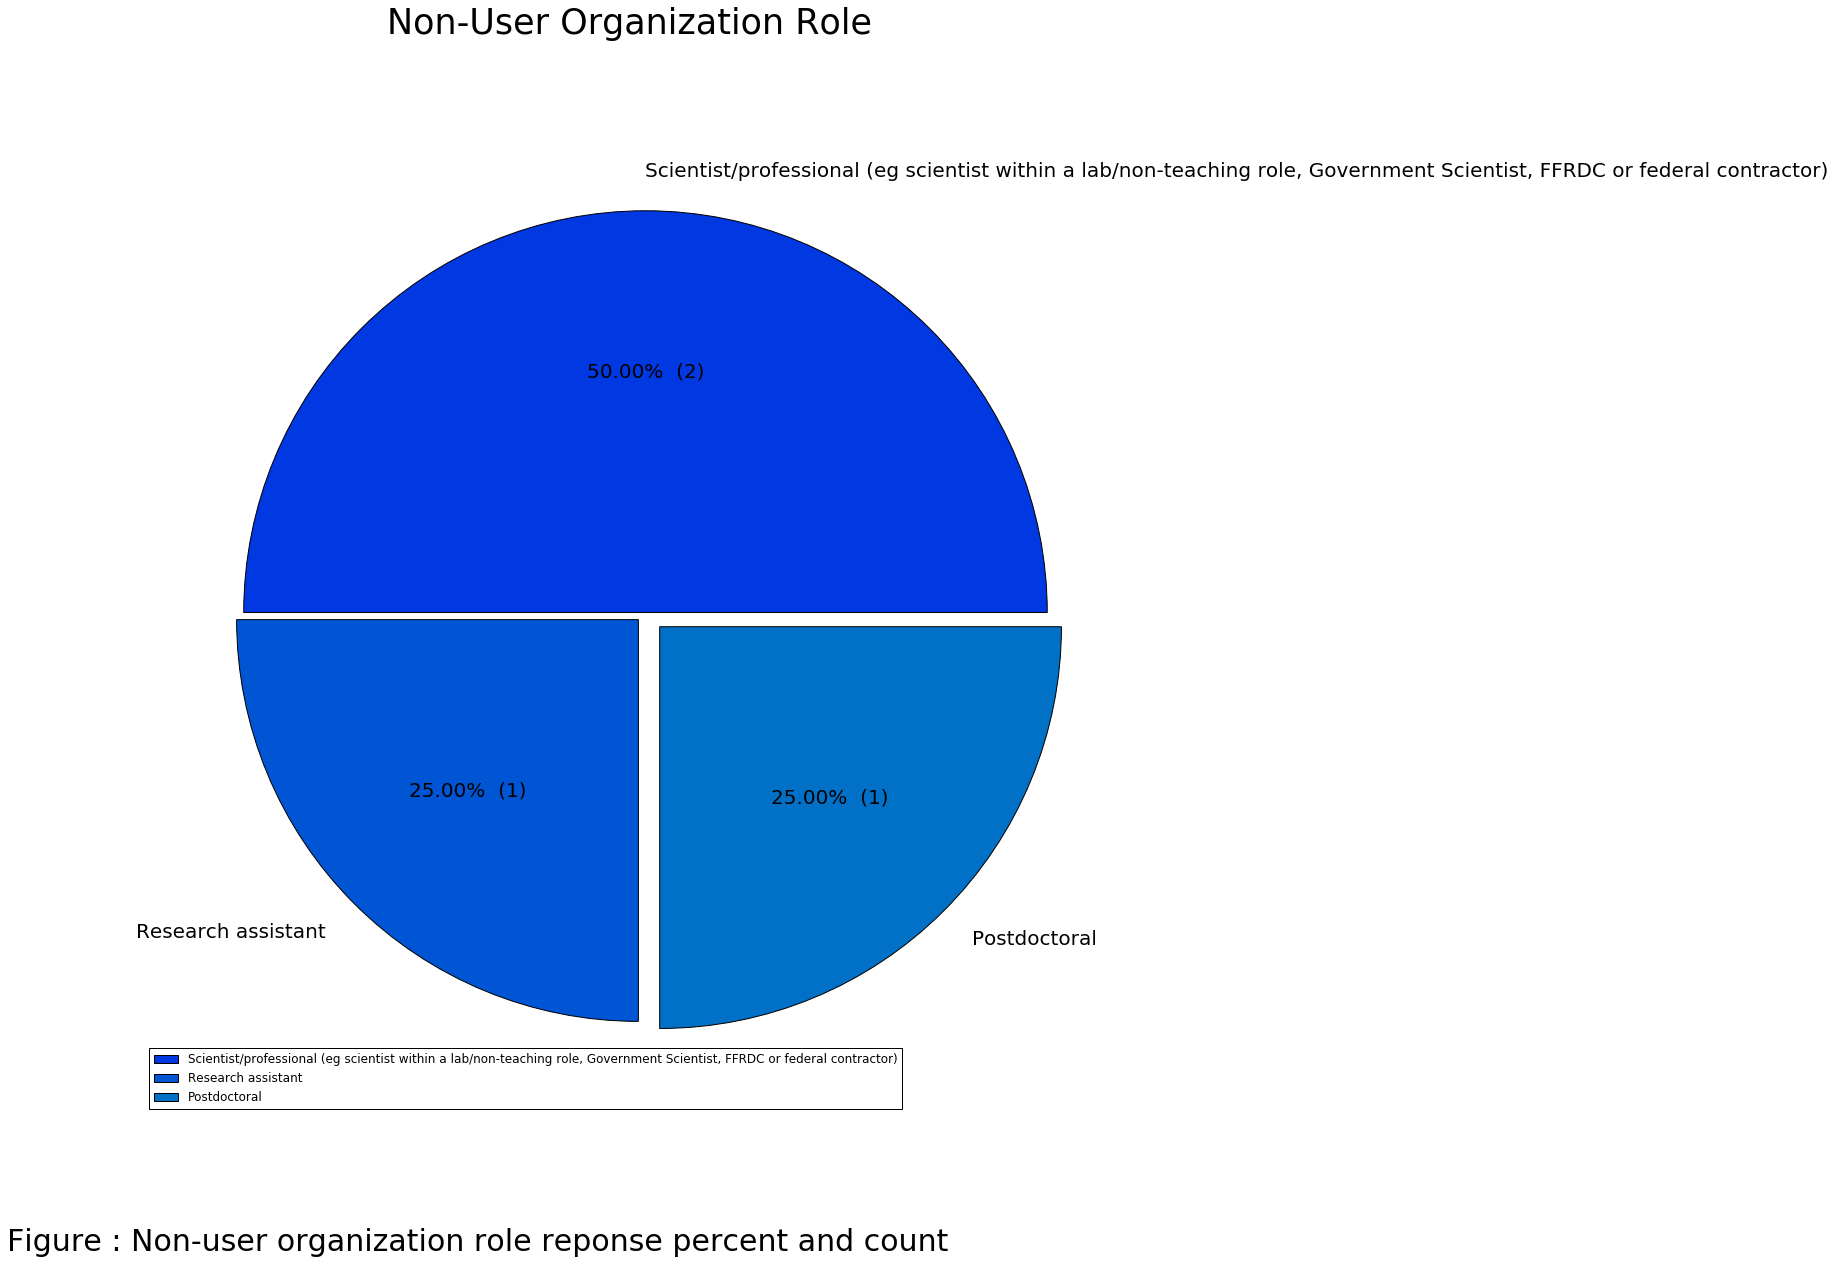

In [220]:
explode= 0, 0.025, 0.05
df_10_17_combo_sorted = df_10_17_combo_no_zeros.sort('Response Count', ascending=False)
df_10_17_combo_sorted['Response Count'].plot.pie(figsize=(18, 18), 
                                     autopct=make_autopct(df_10_17_combo_no_zeros['Response Count']),
                                     colors=colors, fontsize=20, explode=explode, legend=True)
plt.legend(loc='lower left')
plt.ylabel('')
plt.suptitle('Non-User Organization Role', fontsize=35)
plt.figtext(.02, .02, "Figure : Non-user organization role reponse percent and count", 
            fontsize=30)
plt.show()

## User Organization Role

In [138]:
q35 = panda_question_read(35, 2)
q45 = panda_question_read(45, 2)    

q35_results = q35.iloc[0:8,1]
q45_results = q45.iloc[0:8,1]

In [215]:
q35_45_values = q35_results + q45_results
df_35_45_combo= pd.DataFrame(q35_45_values)
df_35_45_combo = df_35_45_combo.rename(columns={0: 'Response Count'})
df_35_45_combo_no_zeros = df_35_45_combo.loc[df_35_45_combo['Response Count'] != 0]
df_35_45_combo

,Response Count
Answer Options,
Undergraduate Student,0
Graduate student,6
Research assistant,3
Postdoctoral,0
"Scientist/professional (eg scientist within a lab/non-teaching role, Government Scientist, FFRDC or federal contractor)",5
Tenure track or Tenured Proffessor,3
Retired,0
None of the above,1


/home/zsherman/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


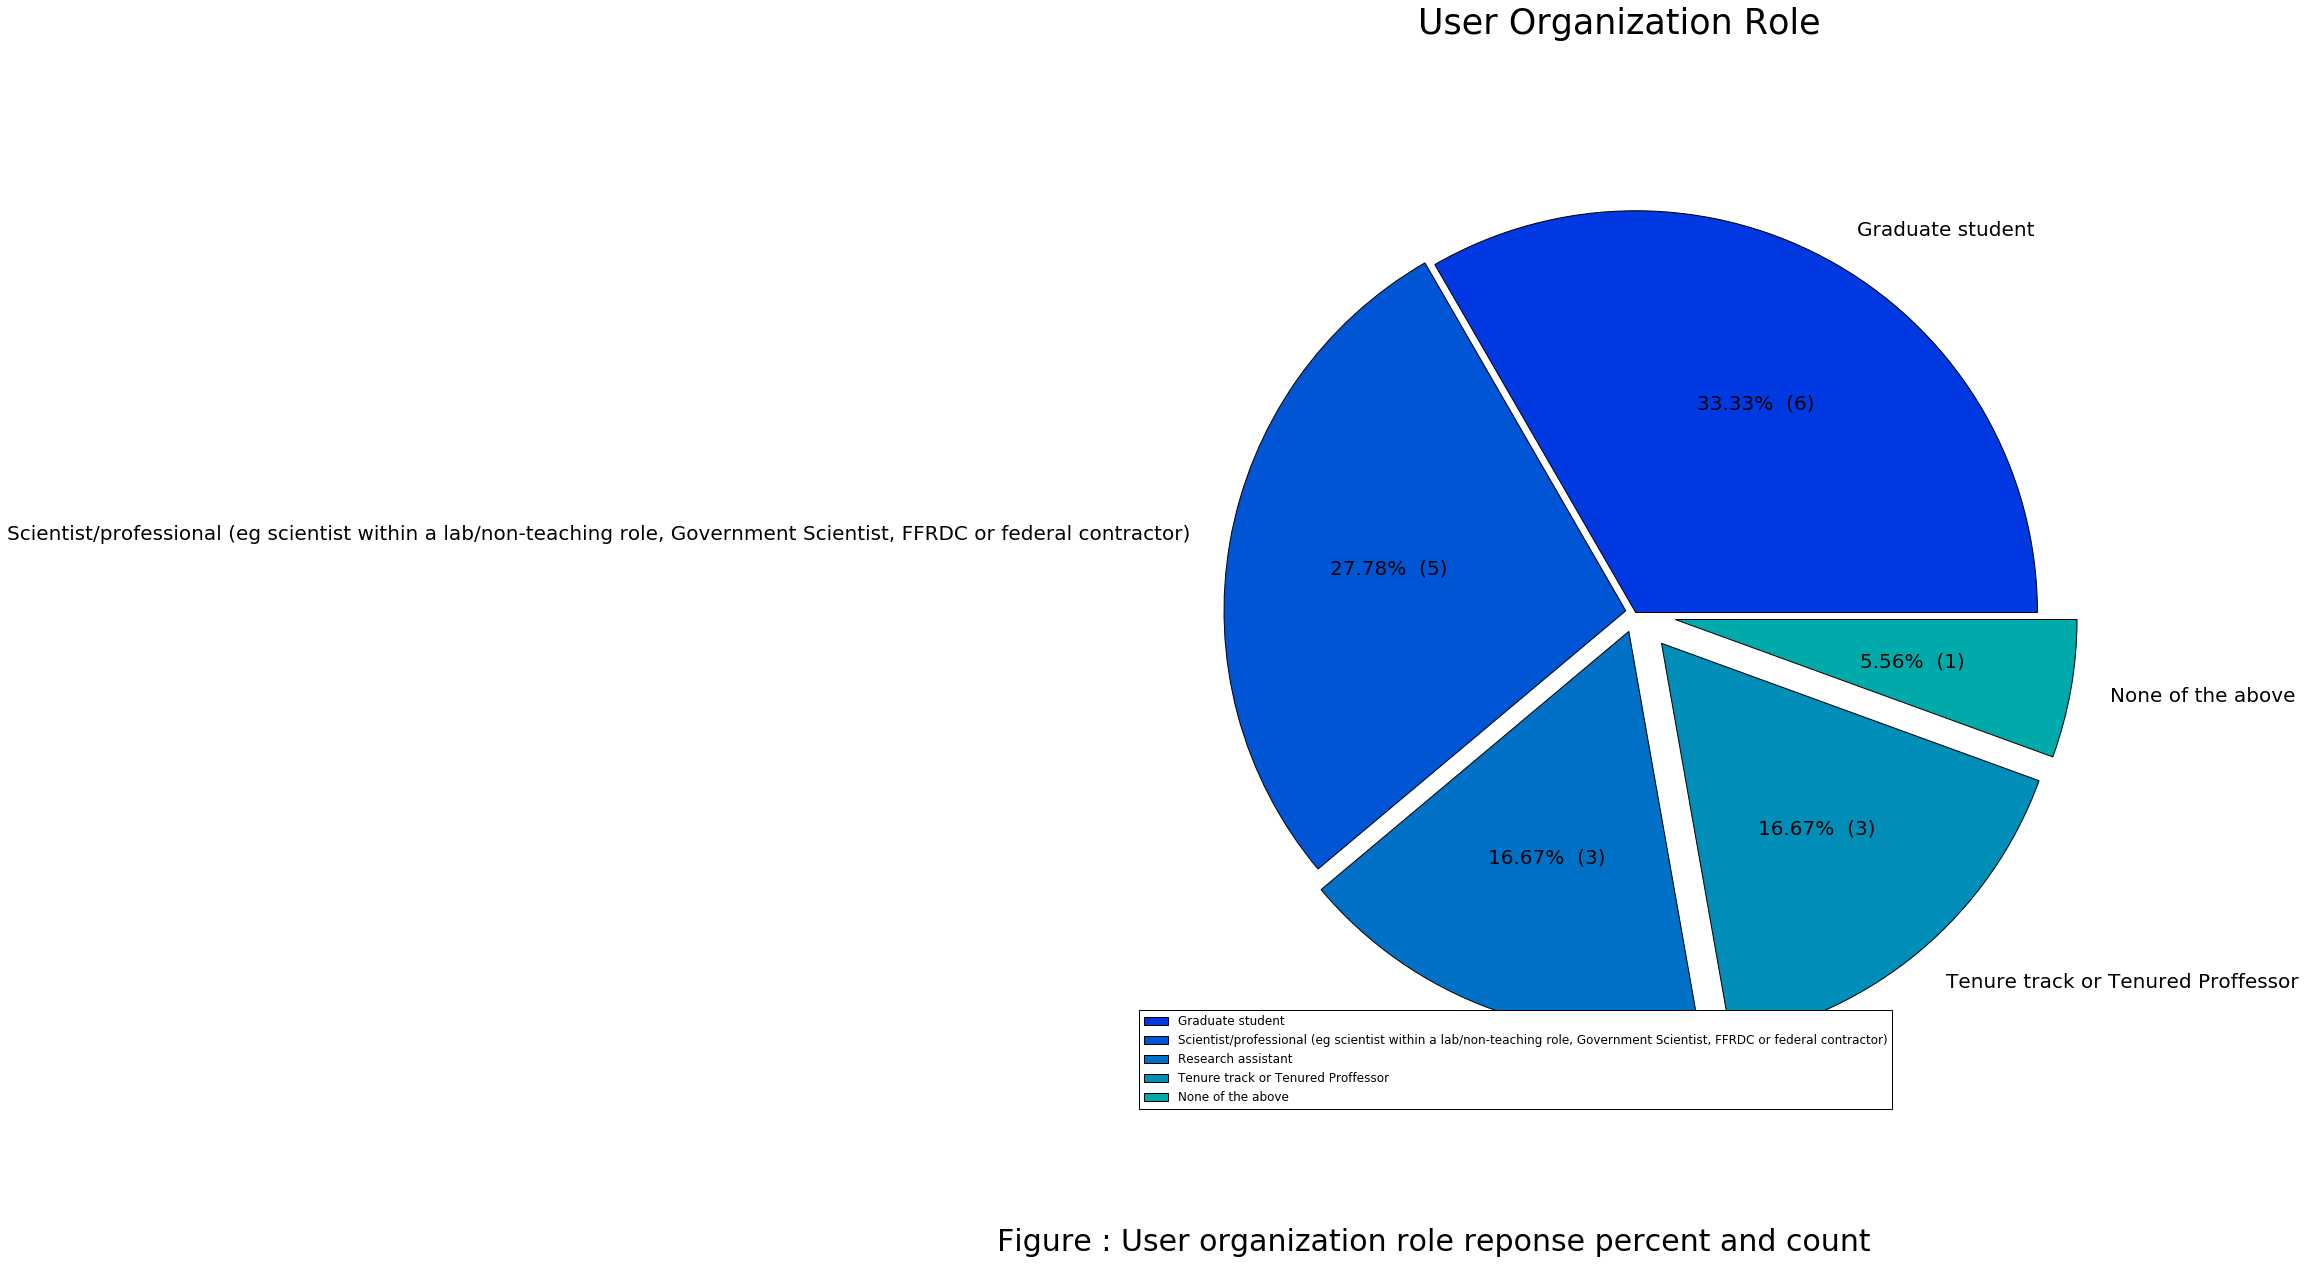

In [217]:
explode= 0, 0.025, 0.05,0.1,0.1
df_35_45_combo_sorted = df_35_45_combo_no_zeros.sort('Response Count', ascending=False)
df_35_45_combo_sorted['Response Count'].plot.pie(figsize=(18, 18), 
                                     autopct=make_autopct(df_35_45_combo_no_zeros['Response Count']),
                                     colors=colors, fontsize=20, explode=explode, legend=True)
plt.ylabel('')
plt.suptitle('User Organization Role', fontsize=35)
plt.legend(loc='lower left')
plt.figtext(.02, .02, "Figure : User organization role reponse percent and count", 
            fontsize=30)
plt.show()